# Foreign Aid relationship to Mortality
Reduced '.csv' files from WB_data Notebook

In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import requests
import matplotlib.pyplot as plt
from matplotlib import cbook
from scipy.stats import linregress
import scipy.stats as st
import scipy.stats as stats
import numpy as np
import time

# Impor the OpenWeatherMap API key
from api_keys import geoapify_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Upload data summaries for plotting

In [2]:
#FOREIGN AID - summary for years 2000 and 2022
# Upload data generated by WP_ForeignAid_upd.py
aid_summary = Path("Resources/WB_aid_summary.csv")

In [3]:
# Read data file with the Pandas library
aid_summary2 = pd.read_csv(aid_summary)

In [4]:
aid_summary2

,2000 Total Foreign Aid (USD millions),2023 Total Foreign Aid (USD millions)
0,1264.019978,377.160009
1,134.089999,305.799995
2,1048.580002,4415.510057
3,302.819999,2166.040022
4,489.799994,2245.049972
5,267.580001,301.839998
6,5949.459961,13496.160319
7,2687.640014,15778.120350
8,48.890000,524.469993
9,2266.500036,3148.980062


In [5]:
#FOREIGN AID - summary for years 2000 and 2022
# Upload data generated by WP_ForeignAid_upd.py
Aid_table = Path("Resources/Aid_table.csv")

In [6]:
# Read data file with the Pandas library
Aid_table2 = pd.read_csv(Aid_table)

In [7]:
Aid_table2

,year,Angola,Botswana,Burkina Faso,Central African Republic,Chad,Djibouti,"Egypt, Arab Rep.",Ethiopia,Gabon,...,Senegal,Sierra Leone,Somalia,Sudan,Tanzania,Togo,Tunisia,Uganda,Zambia,Zimbabwe
0,2000,1.264020e+09,1.340900e+08,1.048580e+09,3.028200e+08,4.898000e+08,2.675800e+08,5.949460e+09,2.687640e+09,4.889000e+07,...,1.781400e+09,7.238300e+08,4.403000e+08,8.013600e+08,4.272150e+09,2.898200e+08,1.023130e+09,3.445760e+09,3.082670e+09,8.142600e+08
1,2001,1.242170e+09,1.225300e+08,1.555170e+09,3.234500e+08,7.313400e+08,2.264600e+08,5.694220e+09,3.818770e+09,3.438000e+07,...,1.622930e+09,1.303290e+09,6.342500e+08,7.783200e+08,5.302940e+09,1.884600e+08,1.712300e+09,3.087800e+09,2.123760e+09,7.283000e+08
2,2002,1.759030e+09,1.666200e+08,1.751830e+09,2.403300e+08,8.163700e+08,2.652400e+08,5.635240e+09,4.590960e+09,3.222500e+08,...,1.735400e+09,1.474980e+09,6.534100e+08,1.281920e+09,5.222390e+09,2.194100e+08,9.878400e+08,2.880270e+09,2.991970e+09,8.717700e+08
3,2003,2.051470e+09,1.187900e+08,1.984150e+09,1.946300e+08,8.689100e+08,2.729900e+08,4.106150e+09,6.242520e+09,-5.346000e+07,...,1.785440e+09,1.266870e+09,7.351300e+08,2.644230e+09,6.352000e+09,2.205900e+08,1.284600e+09,3.731400e+09,3.164210e+09,7.895700e+08
4,2004,4.767360e+09,1.793700e+08,2.293860e+09,4.245200e+08,1.181890e+09,2.319600e+08,6.167180e+09,6.440020e+09,1.552100e+08,...,3.991270e+09,1.292470e+09,8.094300e+08,4.125700e+09,6.334600e+09,2.617400e+08,1.361420e+09,4.351780e+09,4.233770e+09,8.082500e+08
5,2005,1.555180e+09,2.050500e+08,2.428970e+09,3.413900e+08,1.358250e+09,2.760500e+08,4.080680e+09,7.051800e+09,1.979900e+08,...,2.497980e+09,1.174500e+09,9.410300e+08,7.503430e+09,5.332120e+09,3.160200e+08,1.516780e+09,4.217350e+09,4.474630e+09,1.279370e+09
6,2006,5.575600e+08,2.756100e+08,3.001130e+09,4.503900e+08,1.057630e+09,4.316300e+08,3.549220e+09,6.885890e+09,1.358900e+08,...,2.970250e+09,1.290430e+09,1.567810e+09,8.183240e+09,6.455920e+09,3.033400e+08,1.803700e+09,5.643320e+09,5.654470e+09,1.107100e+09
7,2007,7.998300e+08,4.231300e+08,2.828970e+09,6.665400e+08,1.324750e+09,3.731800e+08,4.551500e+09,7.867030e+09,1.943800e+08,...,2.612310e+09,1.954630e+09,1.488960e+09,8.368020e+09,8.828090e+09,4.456700e+08,1.311930e+09,5.096000e+09,3.514990e+09,1.866270e+09
8,2008,1.239280e+09,2.944200e+09,2.893750e+09,8.419200e+08,1.808880e+09,4.212900e+08,5.954060e+09,1.032913e+10,2.295300e+08,...,3.270920e+09,1.098200e+09,2.990110e+09,9.536690e+09,6.984580e+09,9.888200e+08,1.413070e+09,5.531530e+09,3.840530e+09,2.473630e+09
9,2009,8.198500e+08,1.134090e+09,2.990150e+09,7.432900e+08,2.108780e+09,5.290500e+08,3.595850e+09,9.895930e+09,2.791400e+08,...,3.103620e+09,1.450390e+09,2.590270e+09,9.253540e+09,7.876600e+09,1.824290e+09,1.898240e+09,5.205600e+09,4.266810e+09,2.968820e+09


In [8]:
#MORTALITY
# Upload data generated by WP_Mortality_upd.py
Mort_combo_table = Path("Resources/Mort_combo_table.csv")

In [9]:
# Read data file with the Pandas library
Mort_combo_table2 = pd.read_csv(Mort_combo_table)

In [10]:
Mort_combo_table2

,Angola,Botswana,Burkina Faso,Central African Republic,Chad,Djibouti,"Egypt, Arab Rep.",Ethiopia,Gabon,Ghana,...,Senegal,Sierra Leone,Somalia,Sudan,Tanzania,Togo,Tunisia,Uganda,Zambia,Zimbabwe
0,202.9,77.8,178.0,165.2,184.1,99.7,46.7,141.2,84.4,100.0,...,129.6,225.3,171.9,103.4,129.0,119.8,29.4,145.8,156.3,94.5
1,197.0,76.5,173.9,162.5,180.7,97.4,44.0,135.0,82.6,96.0,...,122.8,219.9,171.9,100.0,121.0,116.2,27.4,139.0,147.6,92.5
2,190.0,74.8,169.4,159.5,177.3,95.1,41.6,128.6,80.7,92.2,...,115.0,214.2,171.9,96.5,113.1,112.8,25.7,131.3,137.1,91.2
3,182.3,74.4,164.3,156.1,173.9,92.8,39.4,122.2,78.6,88.9,...,106.9,208.4,171.9,93.2,105.6,109.4,24.1,123.2,126.6,90.3
4,173.7,73.6,158.5,152.5,170.4,90.4,37.5,115.8,76.4,86.0,...,99.0,202.3,171.9,90.0,98.8,106.2,22.8,115.0,116.3,90.5
5,164.7,69.4,152.2,148.7,166.9,88.0,35.8,109.5,74.2,83.4,...,91.6,196.0,171.8,87.0,92.5,103.1,21.7,107.1,107.0,91.4
6,155.2,65.3,145.5,144.3,163.2,85.6,34.2,103.3,72.1,81.1,...,85.1,189.3,171.2,84.2,87.0,100.1,20.8,99.7,99.0,93.6
7,145.9,64.0,138.8,140.2,159.5,83.1,32.7,97.6,69.6,78.7,...,79.4,182.4,169.3,81.5,81.6,97.2,20.1,93.0,93.3,94.5
8,136.7,63.5,132.4,136.4,155.6,80.6,31.3,92.2,67.1,75.9,...,74.4,175.2,165.9,79.0,77.1,94.4,19.6,86.9,88.3,93.3
9,127.7,61.1,126.5,132.5,151.6,78.3,30.0,87.2,64.6,72.9,...,70.1,168.1,161.1,76.7,72.5,91.6,19.1,81.5,83.1,90.2


In [11]:
#POPULATION
# Upload data generated by WP_Population_upd.py
TOT_table = Path("Resources/TOT_table.csv")

In [12]:
# Read data file with the Pandas library
TOT_pop_table = pd.read_csv(TOT_table)

In [13]:
TOT_pop_table2 = TOT_pop_table.drop(23)
TOT_pop_table2

,Angola,Botswana,Burkina Faso,Central African Republic,Chad,Djibouti,"Egypt, Arab Rep.",Ethiopia,Gabon,Ghana,...,Senegal,Sierra Leone,Somalia,Sudan,Tanzania,Togo,Tunisia,Uganda,Zambia,Zimbabwe
0,16394062.0,1726985.0,11882888.0,3759170.0,8259137.0,742033.0,71371371.0,67031867.0,1272935.0,19665502.0,...,9704287.0,4584067.0,8721465.0,26298773.0,34463704.0,5008035.0,9893316.0,24020697.0,9891136.0,11834676.0
1,16941587.0,1761930.0,12249764.0,3844773.0,8538804.0,765490.0,72854261.0,69018932.0,1306590.0,20195577.0,...,9938027.0,4857096.0,9070747.0,26947253.0,35414469.0,5145426.0,9995123.0,24763325.0,10191964.0,11910978.0
2,17516139.0,1795130.0,12632269.0,3930648.0,8838369.0,789129.0,74393759.0,71073215.0,1341696.0,20758326.0,...,10180950.0,5140113.0,9411103.0,27570318.0,36353531.0,5281538.0,10094561.0,25545090.0,10508294.0,11984644.0
3,18124342.0,1826863.0,13030591.0,4026841.0,9196366.0,806411.0,75963322.0,73168838.0,1378398.0,21329514.0,...,10434504.0,5350907.0,9758281.0,28188977.0,37333918.0,5421001.0,10193798.0,26354736.0,10837973.0,12075828.0
4,18771125.0,1859085.0,13445977.0,4115138.0,9613503.0,818373.0,77522427.0,75301026.0,1417110.0,21906444.0,...,10698691.0,5533329.0,10117354.0,28831550.0,38360879.0,5565218.0,10292225.0,27146084.0,11188040.0,12160881.0
5,19450959.0,1892807.0,13876127.0,4208834.0,10005012.0,830861.0,79075310.0,77469940.0,1458353.0,22496951.0,...,10974057.0,5683334.0,10467292.0,29540577.0,39439505.0,5711597.0,10388344.0,27946588.0,11564870.0,12224753.0
6,20162340.0,1928704.0,14316242.0,4294352.0,10365614.0,846947.0,80629670.0,79691050.0,1502534.0,23098586.0,...,11263387.0,5809774.0,10784973.0,30332968.0,40562052.0,5874240.0,10483558.0,28773227.0,11971567.0,12330490.0
7,20909684.0,1966977.0,14757074.0,4375569.0,10722731.0,865196.0,82218755.0,81996185.0,1549774.0,23708320.0,...,11563869.0,5939163.0,11118092.0,31191163.0,41716497.0,6047537.0,10580395.0,29629804.0,12402073.0,12450568.0
8,21691522.0,2007320.0,15197915.0,4467233.0,11098664.0,882886.0,83844783.0,84357105.0,1599978.0,24326087.0,...,11872929.0,6090860.0,11444870.0,32065241.0,42870884.0,6222482.0,10680380.0,30509862.0,12852966.0,12550347.0
9,22507674.0,2048997.0,15650022.0,4564540.0,11496128.0,901103.0,85501064.0,86755585.0,1653542.0,24950762.0,...,12195029.0,6259842.0,11730037.0,32948155.0,43957933.0,6398624.0,10784504.0,31412520.0,13318087.0,12679810.0


In [14]:
# FEMALE MORTALITY
# Upload data generated by WP_Mortality_upd.py
Mort_fem_table = Path("Resources/Mort_fem_table.csv")

In [15]:
# Read data file with the Pandas library
Mort_fem_table2 = pd.read_csv(Mort_fem_table)

In [16]:
Mort_fem_table2

,Angola,Botswana,Burkina Faso,Central African Republic,Chad,Djibouti,"Egypt, Arab Rep.",Ethiopia,Gabon,Ghana,...,Senegal,Sierra Leone,Somalia,Sudan,Tanzania,Togo,Tunisia,Uganda,Zambia,Zimbabwe
0,190.9,73.9,171.5,157.5,175.0,92.9,44.8,129.8,77.6,92.0,...,122.7,214.7,164.3,95.9,122.9,111.0,26.5,134.3,147.0,87.8
1,185.3,72.9,167.4,154.9,171.6,90.9,42.1,123.8,75.9,88.2,...,116.2,209.8,164.4,92.6,115.2,107.7,24.7,127.9,138.4,86.0
2,178.7,71.1,162.8,152.1,168.1,88.6,39.7,117.7,74.1,84.4,...,108.5,204.5,164.5,89.3,107.3,104.5,23.2,120.8,128.1,84.7
3,171.1,70.6,157.8,148.8,164.6,86.3,37.6,111.4,72.2,81.2,...,100.6,199.1,164.6,86.3,99.9,101.5,21.8,113.3,117.9,83.9
4,162.8,69.7,152.3,145.1,161.3,83.9,35.7,105.2,70.1,78.3,...,92.9,193.5,164.6,83.2,93.2,98.5,20.7,105.6,107.9,84.1
5,154.2,65.5,146.0,141.2,157.9,81.6,34.1,99.2,68.0,75.8,...,85.7,187.4,164.5,80.4,87.1,95.7,19.7,98.2,99.0,85.0
6,145.1,61.2,139.6,136.7,154.6,79.2,32.5,93.3,66.0,73.5,...,79.4,181.0,163.9,77.7,81.7,93.1,18.9,91.3,91.5,87.1
7,136.1,59.5,133.3,132.7,150.8,76.7,31.1,87.8,63.6,71.2,...,73.8,174.1,161.9,75.1,76.5,90.4,18.3,85.1,86.1,88.0
8,127.3,59.0,127.1,128.8,147.1,74.4,29.6,82.8,61.3,68.6,...,68.9,167.0,158.6,72.7,72.0,87.8,17.8,79.3,81.5,87.0
9,118.7,56.4,121.3,125.0,143.2,72.2,28.3,78.0,58.9,65.9,...,64.7,160.1,154.0,70.5,67.5,85.2,17.5,74.3,76.5,84.0


In [17]:
# MALE MORTALITY
# Upload data generated by WP_Mortality_upd.py
Mort_ma_table = Path("Resources/Mort_ma_table.csv")

In [18]:
# Read data file with the Pandas library
Mort_ma_table2 = pd.read_csv(Mort_ma_table)

In [19]:
Mort_ma_table2

,Angola,Botswana,Burkina Faso,Central African Republic,Chad,Djibouti,"Egypt, Arab Rep.",Ethiopia,Gabon,Ghana,...,Senegal,Sierra Leone,Somalia,Sudan,Tanzania,Togo,Tunisia,Uganda,Zambia,Zimbabwe
0,214.2,81.4,184.1,172.5,192.8,106.0,48.5,152.0,90.9,107.6,...,136.0,235.2,178.9,110.6,134.7,128.1,32.1,156.7,165.2,100.7
1,207.8,79.9,180.1,169.7,189.3,103.7,45.9,145.6,89.0,103.5,...,129.1,229.3,179.0,107.0,126.5,124.4,29.9,149.4,156.3,98.7
2,200.7,78.4,175.8,166.5,185.9,101.3,43.4,139.0,86.9,99.6,...,121.2,223.4,178.9,103.4,118.6,120.6,28.0,141.2,145.7,97.3
3,192.7,78.0,170.6,163.1,182.6,98.9,41.2,132.5,84.8,96.2,...,112.9,217.2,178.8,99.8,111.0,117.0,26.3,132.6,134.9,96.3
4,183.9,77.3,164.5,159.5,179.0,96.6,39.2,125.8,82.5,93.4,...,104.7,210.7,178.9,96.5,104.0,113.4,24.9,123.9,124.2,96.6
5,174.6,73.1,158.0,155.8,175.3,94.0,37.4,119.2,80.1,90.7,...,97.1,204.1,178.8,93.3,97.6,110.1,23.6,115.5,114.5,97.5
6,164.9,69.2,151.0,151.5,171.4,91.5,35.8,112.9,77.8,88.3,...,90.5,197.3,178.2,90.3,92.0,106.8,22.6,107.7,106.1,99.8
7,155.3,68.1,144.1,147.4,167.6,89.0,34.3,106.8,75.2,85.7,...,84.7,190.3,176.2,87.5,86.6,103.8,21.8,100.6,100.2,100.6
8,145.9,67.9,137.5,143.6,163.7,86.5,32.9,101.1,72.7,82.9,...,79.6,183.0,172.7,85.0,81.9,100.7,21.2,94.1,94.8,99.4
9,136.6,65.4,131.4,139.8,159.6,84.0,31.5,95.8,70.1,79.6,...,75.2,175.6,168.0,82.5,77.3,97.7,20.7,88.3,89.3,96.1


In [33]:
# TOTAL POPULATION BY COUNTRY
# Upload data generated by WP_Mortality_upd.py
TOT_table_country2 = Path("Resources\TOT_table_country2.csv")

In [34]:
# Read data file with the Pandas library
TOT_table_country2 = pd.read_csv(TOT_table_country2)

In [35]:
TOT_table_country2

,country_name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Angola,16394062.0,16941587.0,17516139.0,18124342.0,18771125.0,19450959.0,20162340.0,20909684.0,21691522.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0
1,Botswana,1726985.0,1761930.0,1795130.0,1826863.0,1859085.0,1892807.0,1928704.0,1966977.0,2007320.0,...,2260376.0,2305171.0,2352416.0,2401840.0,2451409.0,2499702.0,2546402.0,2588423.0,2630296.0,2675352.0
2,Burkina Faso,11882888.0,12249764.0,12632269.0,13030591.0,13445977.0,13876127.0,14316242.0,14757074.0,15197915.0,...,18169842.0,18718019.0,19275498.0,19835858.0,20392723.0,20951639.0,21522626.0,22100683.0,22673762.0,23251485.0
3,Central African Republic,3759170.0,3844773.0,3930648.0,4026841.0,4115138.0,4208834.0,4294352.0,4375569.0,4467233.0,...,4798734.0,4819333.0,4904177.0,4996741.0,5094780.0,5209324.0,5343020.0,5457154.0,5579144.0,5742315.0
4,Chad,8259137.0,8538804.0,8838369.0,9196366.0,9613503.0,10005012.0,10365614.0,10722731.0,11098664.0,...,13697126.0,14140274.0,14592585.0,15085884.0,15604210.0,16126866.0,16644701.0,17179740.0,17723315.0,18278568.0
5,Djibouti,742033.0,765490.0,789129.0,806411.0,818373.0,830861.0,846947.0,865196.0,882886.0,...,989087.0,1006259.0,1023261.0,1040233.0,1057198.0,1073994.0,1090156.0,1105557.0,1120849.0,1136455.0
6,"Egypt, Arab Rep.",71371371.0,72854261.0,74393759.0,75963322.0,77522427.0,79075310.0,80629670.0,82218755.0,83844783.0,...,95592324.0,97723799.0,99784030.0,101789386.0,103740765.0,105618671.0,107465134.0,109262178.0,110990103.0,112716598.0
7,Ethiopia,67031867.0,69018932.0,71073215.0,73168838.0,75301026.0,77469940.0,79691050.0,81996185.0,84357105.0,...,99746766.0,102471895.0,105293228.0,108197950.0,111129438.0,114120594.0,117190911.0,120283026.0,123379924.0,126527060.0
8,Gabon,1272935.0,1306590.0,1341696.0,1378398.0,1417110.0,1458353.0,1502534.0,1549774.0,1599978.0,...,1966855.0,2028517.0,2086206.0,2140215.0,2192012.0,2242785.0,2292573.0,2341179.0,2388992.0,2436566.0
9,Ghana,19665502.0,20195577.0,20758326.0,21329514.0,21906444.0,22496951.0,23098586.0,23708320.0,24326087.0,...,28196358.0,28870939.0,29554303.0,30222262.0,30870641.0,31522290.0,32180401.0,32833031.0,33475870.0,34121985.0


In [39]:
# TOTAL POPULATION BY COUNTRY
# Upload data generated by WP_Mortality_upd.py
aid_table_country = Path("Resources/aid_table_country.csv")

In [40]:
# Read data file with the Pandas library
aid_table_country = pd.read_csv(aid_table_country)

In [41]:
aid_table_country

,country_name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Angola,1.264020e+09,1.242170e+09,1.759030e+09,2.051470e+09,4.767360e+09,1.555180e+09,5.575600e+08,7.998300e+08,1.239280e+09,...,9.340200e+08,7.870300e+08,1.419110e+09,6.578700e+08,6.839400e+08,5.423800e+08,2.242600e+08,3.972700e+08,8.850200e+08,3.771600e+08
1,Botswana,1.340900e+08,1.225300e+08,1.666200e+08,1.187900e+08,1.793700e+08,2.050500e+08,2.756100e+08,4.231300e+08,2.944200e+09,...,4.342800e+08,4.039900e+08,2.652600e+08,3.539400e+08,3.877700e+08,3.171900e+08,2.585100e+08,3.048500e+08,3.491600e+08,3.058000e+08
2,Burkina Faso,1.048580e+09,1.555170e+09,1.751830e+09,1.984150e+09,2.293860e+09,2.428970e+09,3.001130e+09,2.828970e+09,2.893750e+09,...,3.569450e+09,3.792110e+09,3.231290e+09,3.247480e+09,3.062310e+09,3.726470e+09,3.701530e+09,5.430370e+09,5.010880e+09,4.415510e+09
3,Central African Republic,3.028200e+08,3.234500e+08,2.403300e+08,1.946300e+08,4.245200e+08,3.413900e+08,4.503900e+08,6.665400e+08,8.419200e+08,...,7.092500e+08,2.119940e+09,1.845740e+09,1.852780e+09,1.771640e+09,2.113720e+09,2.261950e+09,2.662290e+09,2.138980e+09,2.166040e+09
4,Chad,4.898000e+08,7.313400e+08,8.163700e+08,8.689100e+08,1.181890e+09,1.358250e+09,1.057630e+09,1.324750e+09,1.808880e+09,...,1.660270e+09,1.390700e+09,2.094440e+09,1.988760e+09,2.094560e+09,2.768430e+09,2.079940e+09,3.021770e+09,2.273560e+09,2.245050e+09
5,Djibouti,2.675800e+08,2.264600e+08,2.652400e+08,2.729900e+08,2.319600e+08,2.760500e+08,4.316300e+08,3.731800e+08,4.212900e+08,...,5.135900e+08,5.599500e+08,5.636100e+08,5.606500e+08,4.757400e+08,5.672700e+08,8.399700e+08,7.481500e+08,4.895800e+08,3.018400e+08
6,"Egypt, Arab Rep.",5.949460e+09,5.694220e+09,5.635240e+09,4.106150e+09,6.167180e+09,4.080680e+09,3.549220e+09,4.551500e+09,5.954060e+09,...,1.154155e+10,7.727810e+09,5.991480e+09,6.346280e+09,5.031700e+08,5.898500e+09,5.621300e+09,5.181470e+09,2.123570e+10,1.349616e+10
7,Ethiopia,2.687640e+09,3.818770e+09,4.590960e+09,6.242520e+09,6.440020e+09,7.051800e+09,6.885890e+09,7.867030e+09,1.032913e+10,...,1.198721e+10,1.162715e+10,1.089380e+10,1.351143e+10,1.359282e+10,1.492361e+10,1.451494e+10,1.606175e+10,1.347548e+10,1.577812e+10
8,Gabon,4.889000e+07,3.438000e+07,3.222500e+08,-5.346000e+07,1.552100e+08,1.979900e+08,1.358900e+08,1.943800e+08,2.295300e+08,...,3.366100e+08,4.311700e+08,3.956500e+08,1.558800e+08,4.321700e+08,4.563300e+08,4.895900e+08,2.015100e+08,3.708000e+08,5.244700e+08
9,Ghana,2.266500e+09,2.494700e+09,2.645900e+09,3.425880e+09,5.106280e+09,3.919870e+09,3.988150e+09,3.492530e+09,3.784470e+09,...,4.215620e+09,3.576670e+09,5.346110e+09,4.188250e+09,3.923370e+09,3.620690e+09,3.011950e+09,5.888750e+09,4.109440e+09,3.148980e+09


# Preparing Data for vizualization

In [20]:
# prepare data for plotting
Mort_combo_table2.insert(0, "Year", Aid_table2['year'])
Mort_combo_table2["Average Mortality Rate"] = Mort_combo_table2.mean(axis=1)
Mort_combo_table2["Median Mortality Rate"] = Mort_combo_table2.median(axis=1)
Mort_combo_table2["Max Mortality Rate"] = Mort_combo_table2.max(axis=1)
Mort_combo_table2["Minimum Mortality Rate"] = Mort_combo_table2.min(axis=1)
Mort_combo_table2

,Year,Angola,Botswana,Burkina Faso,Central African Republic,Chad,Djibouti,"Egypt, Arab Rep.",Ethiopia,Gabon,...,Tanzania,Togo,Tunisia,Uganda,Zambia,Zimbabwe,Average Mortality Rate,Median Mortality Rate,Max Mortality Rate,Minimum Mortality Rate
0,2000,202.9,77.8,178.0,165.2,184.1,99.7,46.7,141.2,84.4,...,129.0,119.8,29.4,145.8,156.3,94.5,187.509375,129.6,2000.0,21.2
1,2001,197.0,76.5,173.9,162.5,180.7,97.4,44.0,135.0,82.6,...,121.0,116.2,27.4,139.0,147.6,92.5,182.578125,122.8,2001.0,20.5
2,2002,190.0,74.8,169.4,159.5,177.3,95.1,41.6,128.6,80.7,...,113.1,112.8,25.7,131.3,137.1,91.2,177.484375,115.0,2002.0,20.0
3,2003,182.3,74.4,164.3,156.1,173.9,92.8,39.4,122.2,78.6,...,105.6,109.4,24.1,123.2,126.6,90.3,172.500000,114.9,2003.0,19.6
4,2004,173.7,73.6,158.5,152.5,170.4,90.4,37.5,115.8,76.4,...,98.8,106.2,22.8,115.0,116.3,90.5,167.706250,115.0,2004.0,19.4
5,2005,164.7,69.4,152.2,148.7,166.9,88.0,35.8,109.5,74.2,...,92.5,103.1,21.7,107.1,107.0,91.4,163.109375,105.4,2005.0,19.2
6,2006,155.2,65.3,145.5,144.3,163.2,85.6,34.2,103.3,72.1,...,87.0,100.1,20.8,99.7,99.0,93.6,158.865625,99.0,2006.0,19.2
7,2007,145.9,64.0,138.8,140.2,159.5,83.1,32.7,97.6,69.6,...,81.6,97.2,20.1,93.0,93.3,94.5,154.853125,93.3,2007.0,19.2
8,2008,136.7,63.5,132.4,136.4,155.6,80.6,31.3,92.2,67.1,...,77.1,94.4,19.6,86.9,88.3,93.3,151.040625,88.3,2008.0,19.3
9,2009,127.7,61.1,126.5,132.5,151.6,78.3,30.0,87.2,64.6,...,72.5,91.6,19.1,81.5,83.1,90.2,147.284375,83.1,2009.0,19.1


In [21]:
TOT_pop_table2.insert(0, "Year", Aid_table2['year'])
TOT_pop_table2["Total Population"] = TOT_pop_table.sum(axis=1)
TOT_pop_table2

,Year,Angola,Botswana,Burkina Faso,Central African Republic,Chad,Djibouti,"Egypt, Arab Rep.",Ethiopia,Gabon,...,Sierra Leone,Somalia,Sudan,Tanzania,Togo,Tunisia,Uganda,Zambia,Zimbabwe,Total Population
0,2000,16394062.0,1726985.0,11882888.0,3759170.0,8259137.0,742033.0,71371371.0,67031867.0,1272935.0,...,4584067.0,8721465.0,26298773.0,34463704.0,5008035.0,9893316.0,24020697.0,9891136.0,11834676.0,561470587.0
1,2001,16941587.0,1761930.0,12249764.0,3844773.0,8538804.0,765490.0,72854261.0,69018932.0,1306590.0,...,4857096.0,9070747.0,26947253.0,35414469.0,5145426.0,9995123.0,24763325.0,10191964.0,11910978.0,576393009.0
2,2002,17516139.0,1795130.0,12632269.0,3930648.0,8838369.0,789129.0,74393759.0,71073215.0,1341696.0,...,5140113.0,9411103.0,27570318.0,36353531.0,5281538.0,10094561.0,25545090.0,10508294.0,11984644.0,591781662.0
3,2003,18124342.0,1826863.0,13030591.0,4026841.0,9196366.0,806411.0,75963322.0,73168838.0,1378398.0,...,5350907.0,9758281.0,28188977.0,37333918.0,5421001.0,10193798.0,26354736.0,10837973.0,12075828.0,607558084.0
4,2004,18771125.0,1859085.0,13445977.0,4115138.0,9613503.0,818373.0,77522427.0,75301026.0,1417110.0,...,5533329.0,10117354.0,28831550.0,38360879.0,5565218.0,10292225.0,27146084.0,11188040.0,12160881.0,623761699.0
5,2005,19450959.0,1892807.0,13876127.0,4208834.0,10005012.0,830861.0,79075310.0,77469940.0,1458353.0,...,5683334.0,10467292.0,29540577.0,39439505.0,5711597.0,10388344.0,27946588.0,11564870.0,12224753.0,640431443.0
6,2006,20162340.0,1928704.0,14316242.0,4294352.0,10365614.0,846947.0,80629670.0,79691050.0,1502534.0,...,5809774.0,10784973.0,30332968.0,40562052.0,5874240.0,10483558.0,28773227.0,11971567.0,12330490.0,657620456.0
7,2007,20909684.0,1966977.0,14757074.0,4375569.0,10722731.0,865196.0,82218755.0,81996185.0,1549774.0,...,5939163.0,11118092.0,31191163.0,41716497.0,6047537.0,10580395.0,29629804.0,12402073.0,12450568.0,675394385.0
8,2008,21691522.0,2007320.0,15197915.0,4467233.0,11098664.0,882886.0,83844783.0,84357105.0,1599978.0,...,6090860.0,11444870.0,32065241.0,42870884.0,6222482.0,10680380.0,30509862.0,12852966.0,12550347.0,693612332.0
9,2009,22507674.0,2048997.0,15650022.0,4564540.0,11496128.0,901103.0,85501064.0,86755585.0,1653542.0,...,6259842.0,11730037.0,32948155.0,43957933.0,6398624.0,10784504.0,31412520.0,13318087.0,12679810.0,712178736.0


In [22]:
TOT_pop_table2["Average Population"] = TOT_pop_table2.mean(axis=1)
TOT_pop_table2["Median Population"] = TOT_pop_table2.median(axis=1)
TOT_pop_table2["Max Population"] = TOT_pop_table2.max(axis=1)
TOT_pop_table2["Minimum Population"] = TOT_pop_table2.min(axis=1)
TOT_pop_table2

,Year,Angola,Botswana,Burkina Faso,Central African Republic,Chad,Djibouti,"Egypt, Arab Rep.",Ethiopia,Gabon,...,Togo,Tunisia,Uganda,Zambia,Zimbabwe,Total Population,Average Population,Median Population,Max Population,Minimum Population
0,2000,16394062.0,1726985.0,11882888.0,3759170.0,8259137.0,742033.0,71371371.0,67031867.0,1272935.0,...,5008035.0,9893316.0,24020697.0,9891136.0,11834676.0,561470587.0,3.402858e+07,9892226.0,561470587.0,2000.0
1,2001,16941587.0,1761930.0,12249764.0,3844773.0,8538804.0,765490.0,72854261.0,69018932.0,1306590.0,...,5145426.0,9995123.0,24763325.0,10191964.0,11910978.0,576393009.0,3.493297e+07,10093543.5,576393009.0,2001.0
2,2002,17516139.0,1795130.0,12632269.0,3930648.0,8838369.0,789129.0,74393759.0,71073215.0,1341696.0,...,5281538.0,10094561.0,25545090.0,10508294.0,11984644.0,591781662.0,3.586562e+07,10344622.0,591781662.0,2002.0
3,2003,18124342.0,1826863.0,13030591.0,4026841.0,9196366.0,806411.0,75963322.0,73168838.0,1378398.0,...,5421001.0,10193798.0,26354736.0,10837973.0,12075828.0,607558084.0,3.682176e+07,10636238.5,607558084.0,2003.0
4,2004,18771125.0,1859085.0,13445977.0,4115138.0,9613503.0,818373.0,77522427.0,75301026.0,1417110.0,...,5565218.0,10292225.0,27146084.0,11188040.0,12160881.0,623761699.0,3.780380e+07,10943365.5,623761699.0,2004.0
5,2005,19450959.0,1892807.0,13876127.0,4208834.0,10005012.0,830861.0,79075310.0,77469940.0,1458353.0,...,5711597.0,10388344.0,27946588.0,11564870.0,12224753.0,640431443.0,3.881409e+07,11269463.5,640431443.0,2005.0
6,2006,20162340.0,1928704.0,14316242.0,4294352.0,10365614.0,846947.0,80629670.0,79691050.0,1502534.0,...,5874240.0,10483558.0,28773227.0,11971567.0,12330490.0,657620456.0,3.985585e+07,11617477.0,657620456.0,2006.0
7,2007,20909684.0,1966977.0,14757074.0,4375569.0,10722731.0,865196.0,82218755.0,81996185.0,1549774.0,...,6047537.0,10580395.0,29629804.0,12402073.0,12450568.0,675394385.0,4.093305e+07,11982971.0,675394385.0,2007.0
8,2008,21691522.0,2007320.0,15197915.0,4467233.0,11098664.0,882886.0,83844783.0,84357105.0,1599978.0,...,6222482.0,10680380.0,30509862.0,12852966.0,12550347.0,693612332.0,4.203717e+07,12211638.0,693612332.0,2008.0
9,2009,22507674.0,2048997.0,15650022.0,4564540.0,11496128.0,901103.0,85501064.0,86755585.0,1653542.0,...,6398624.0,10784504.0,31412520.0,13318087.0,12679810.0,712178736.0,4.316241e+07,12437419.5,712178736.0,2009.0


In [23]:
Aid_table2["Total Foreign Aid"] = Aid_table2.sum(axis=1)
Aid_table2["Average Foreign Aid"] = Aid_table2.mean(axis=1)
Aid_table2["Median Foreign Aid"] = Aid_table2.median(axis=1)
Aid_table2["Max Foreign Aid"] = Aid_table2.max(axis=1)
Aid_table2["Minimum Foreign Aid"] = Aid_table2.min(axis=1)
Aid_table2["Avg Population"] = TOT_pop_table2["Average Population"]
Aid_table2["Foreign Aid Normalized"] = Aid_table2["Average Foreign Aid"]/Aid_table2["Avg Population"]
Aid_table2

,year,Angola,Botswana,Burkina Faso,Central African Republic,Chad,Djibouti,"Egypt, Arab Rep.",Ethiopia,Gabon,...,Uganda,Zambia,Zimbabwe,Total Foreign Aid,Average Foreign Aid,Median Foreign Aid,Max Foreign Aid,Minimum Foreign Aid,Avg Population,Foreign Aid Normalized
0,2000,1.264020e+09,1.340900e+08,1.048580e+09,3.028200e+08,4.898000e+08,2.675800e+08,5.949460e+09,2.687640e+09,4.889000e+07,...,3.445760e+09,3.082670e+09,8.142600e+08,4.319361e+10,2.617795e+09,9.445800e+08,4.319361e+10,2.000000e+03,3.402858e+07,76.929292
1,2001,1.242170e+09,1.225300e+08,1.555170e+09,3.234500e+08,7.313400e+08,2.264600e+08,5.694220e+09,3.818770e+09,3.438000e+07,...,3.087800e+09,2.123760e+09,7.283000e+08,4.649836e+10,2.818083e+09,1.219800e+09,4.649836e+10,2.001000e+03,3.493297e+07,80.671140
2,2002,1.759030e+09,1.666200e+08,1.751830e+09,2.403300e+08,8.163700e+08,2.652400e+08,5.635240e+09,4.590960e+09,3.222500e+08,...,2.880270e+09,2.991970e+09,8.717700e+08,5.520694e+10,3.345875e+09,1.355600e+09,5.520694e+10,2.002000e+03,3.586562e+07,93.289218
3,2003,2.051470e+09,1.187900e+08,1.984150e+09,1.946300e+08,8.689100e+08,2.729900e+08,4.106150e+09,6.242520e+09,-5.346000e+07,...,3.731400e+09,3.164210e+09,7.895700e+08,5.557119e+10,3.367951e+09,1.310120e+09,5.557119e+10,-5.346000e+07,3.682176e+07,91.466317
4,2004,4.767360e+09,1.793700e+08,2.293860e+09,4.245200e+08,1.181890e+09,2.319600e+08,6.167180e+09,6.440020e+09,1.552100e+08,...,4.351780e+09,4.233770e+09,8.082500e+08,7.378910e+10,4.472067e+09,1.773475e+09,7.378910e+10,2.004000e+03,3.780380e+07,118.296752
5,2005,1.555180e+09,2.050500e+08,2.428970e+09,3.413900e+08,1.358250e+09,2.760500e+08,4.080680e+09,7.051800e+09,1.979900e+08,...,4.217350e+09,4.474630e+09,1.279370e+09,9.363716e+10,5.674979e+09,1.781890e+09,9.363716e+10,2.005000e+03,3.881409e+07,146.209272
6,2006,5.575600e+08,2.756100e+08,3.001130e+09,4.503900e+08,1.057630e+09,4.316300e+08,3.549220e+09,6.885890e+09,1.358900e+08,...,5.643320e+09,5.654470e+09,1.107100e+09,1.203566e+11,7.294336e+09,1.944650e+09,1.203566e+11,2.006000e+03,3.985585e+07,183.017981
7,2007,7.998300e+08,4.231300e+08,2.828970e+09,6.665400e+08,1.324750e+09,3.731800e+08,4.551500e+09,7.867030e+09,1.943800e+08,...,5.096000e+09,3.514990e+09,1.866270e+09,8.459237e+10,5.126810e+09,2.074825e+09,8.459237e+10,2.007000e+03,4.093305e+07,125.248667
8,2008,1.239280e+09,2.944200e+09,2.893750e+09,8.419200e+08,1.808880e+09,4.212900e+08,5.954060e+09,1.032913e+10,2.295300e+08,...,5.531530e+09,3.840530e+09,2.473630e+09,9.729035e+10,5.896385e+09,2.905880e+09,9.729035e+10,2.008000e+03,4.203717e+07,140.265976
9,2009,8.198500e+08,1.134090e+09,2.990150e+09,7.432900e+08,2.108780e+09,5.290500e+08,3.595850e+09,9.895930e+09,2.791400e+08,...,5.205600e+09,4.266810e+09,2.968820e+09,9.460457e+10,5.733610e+09,2.539145e+09,9.460457e+10,2.009000e+03,4.316241e+07,132.838056


In [24]:
# prepare data for plotting
Mort_fem_table2.insert(0, "Year", Aid_table2['year'])
Mort_fem_table2["Average Mortality Rate"] = Mort_fem_table2.mean(axis=1)
Mort_fem_table2["Median Mortality Rate"] = Mort_fem_table2.median(axis=1)
Mort_fem_table2["Max Mortality Rate"] = Mort_fem_table2.max(axis=1)
Mort_fem_table2["Minimum Mortality Rate"] = Mort_fem_table2.min(axis=1)
Mort_fem_table2

,Year,Angola,Botswana,Burkina Faso,Central African Republic,Chad,Djibouti,"Egypt, Arab Rep.",Ethiopia,Gabon,...,Tanzania,Togo,Tunisia,Uganda,Zambia,Zimbabwe,Average Mortality Rate,Median Mortality Rate,Max Mortality Rate,Minimum Mortality Rate
0,2000,190.9,73.9,171.5,157.5,175.0,92.9,44.8,129.8,77.6,...,122.9,111.0,26.5,134.3,147.0,87.8,180.268750,122.9,2000.0,19.1
1,2001,185.3,72.9,167.4,154.9,171.6,90.9,42.1,123.8,75.9,...,115.2,107.7,24.7,127.9,138.4,86.0,175.521875,116.2,2001.0,18.5
2,2002,178.7,71.1,162.8,152.1,168.1,88.6,39.7,117.7,74.1,...,107.3,104.5,23.2,120.8,128.1,84.7,170.571875,108.5,2002.0,18.0
3,2003,171.1,70.6,157.8,148.8,164.6,86.3,37.6,111.4,72.2,...,99.9,101.5,21.8,113.3,117.9,83.9,165.750000,106.5,2003.0,17.7
4,2004,162.8,69.7,152.3,145.1,161.3,83.9,35.7,105.2,70.1,...,93.2,98.5,20.7,105.6,107.9,84.1,161.106250,105.2,2004.0,17.4
5,2005,154.2,65.5,146.0,141.2,157.9,81.6,34.1,99.2,68.0,...,87.1,95.7,19.7,98.2,99.0,85.0,156.668750,98.2,2005.0,17.3
6,2006,145.1,61.2,139.6,136.7,154.6,79.2,32.5,93.3,66.0,...,81.7,93.1,18.9,91.3,91.5,87.1,152.581250,91.3,2006.0,17.3
7,2007,136.1,59.5,133.3,132.7,150.8,76.7,31.1,87.8,63.6,...,76.5,90.4,18.3,85.1,86.1,88.0,148.706250,86.1,2007.0,17.3
8,2008,127.3,59.0,127.1,128.8,147.1,74.4,29.6,82.8,61.3,...,72.0,87.8,17.8,79.3,81.5,87.0,145.053125,81.5,2008.0,17.4
9,2009,118.7,56.4,121.3,125.0,143.2,72.2,28.3,78.0,58.9,...,67.5,85.2,17.5,74.3,76.5,84.0,141.446875,76.5,2009.0,17.5


In [25]:
# prepare data for plotting
Mort_ma_table2.insert(0, "Year", Aid_table2['year'])
Mort_ma_table2["Average Mortality Rate"] = Mort_fem_table2.mean(axis=1)
Mort_ma_table2["Median Mortality Rate"] = Mort_fem_table2.median(axis=1)
Mort_ma_table2["Max Mortality Rate"] = Mort_fem_table2.max(axis=1)
Mort_ma_table2["Minimum Mortality Rate"] = Mort_fem_table2.min(axis=1)
Mort_ma_table2

,Year,Angola,Botswana,Burkina Faso,Central African Republic,Chad,Djibouti,"Egypt, Arab Rep.",Ethiopia,Gabon,...,Tanzania,Togo,Tunisia,Uganda,Zambia,Zimbabwe,Average Mortality Rate,Median Mortality Rate,Max Mortality Rate,Minimum Mortality Rate
0,2000,214.2,81.4,184.1,172.5,192.8,106.0,48.5,152.0,90.9,...,134.7,128.1,32.1,156.7,165.2,100.7,224.746354,122.9,2000.0,19.1
1,2001,207.8,79.9,180.1,169.7,189.3,103.7,45.9,145.6,89.0,...,126.5,124.4,29.9,149.4,156.3,98.7,220.220052,116.2,2001.0,18.5
2,2002,200.7,78.4,175.8,166.5,185.9,101.3,43.4,139.0,86.9,...,118.6,120.6,28.0,141.2,145.7,97.3,215.482552,108.5,2002.0,18.0
3,2003,192.7,78.0,170.6,163.1,182.6,98.9,41.2,132.5,84.8,...,111.0,117.0,26.3,132.6,134.9,96.3,211.026389,106.5,2003.0,17.7
4,2004,183.9,77.3,164.5,159.5,179.0,96.6,39.2,125.8,82.5,...,104.0,113.4,24.9,123.9,124.2,96.6,206.752951,105.2,2004.0,17.4
5,2005,174.6,73.1,158.0,155.8,175.3,94.0,37.4,119.2,80.1,...,97.6,110.1,23.6,115.5,114.5,97.5,202.515799,98.2,2005.0,17.3
6,2006,164.9,69.2,151.0,151.5,171.4,91.5,35.8,112.9,77.8,...,92.0,106.8,22.6,107.7,106.1,99.8,198.605035,91.3,2006.0,17.3
7,2007,155.3,68.1,144.1,147.4,167.6,89.0,34.3,106.8,75.2,...,86.6,103.8,21.8,100.6,100.2,100.6,194.936285,86.1,2007.0,17.3
8,2008,145.9,67.9,137.5,143.6,163.7,86.5,32.9,101.1,72.7,...,81.9,100.7,21.2,94.1,94.8,99.4,191.490365,81.5,2008.0,17.4
9,2009,136.6,65.4,131.4,139.8,159.6,84.0,31.5,95.8,70.1,...,77.3,97.7,20.7,88.3,89.3,96.1,188.076302,76.5,2009.0,17.5


In [45]:
del TOT_table_country2 ['2023']
TOT_table_country2["Average Population"] = TOT_table_country2.mean(axis=1)
TOT_table_country2["Median Population"] = TOT_table_country2.median(axis=1)
TOT_table_country2["Max Population"] = TOT_table_country2.max(axis=1)
TOT_table_country2["Minimum Population"] = TOT_table_country2.min(axis=1)
TOT_table_country2

C:\Users\ramir\AppData\Local\Temp\ipykernel_27472\3758656027.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  TOT_table_country2["Average Population"] = TOT_table_country2.mean(axis=1)
C:\Users\ramir\AppData\Local\Temp\ipykernel_27472\3758656027.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  TOT_table_country2["Median Population"] = TOT_table_country2.median(axis=1)
C:\Users\ramir\AppData\Local\Temp\ipykernel_27472\3758656027.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  

,country_name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2017,2018,2019,2020,2021,2022,Average Population,Median Population,Max Population,Minimum Population
0,Angola,16394062.0,16941587.0,17516139.0,18124342.0,18771125.0,19450959.0,20162340.0,20909684.0,21691522.0,...,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,2.506941e+07,2.506941e+07,36684202.0,16394062.0
1,Botswana,1726985.0,1761930.0,1795130.0,1826863.0,1859085.0,1892807.0,1928704.0,1966977.0,2007320.0,...,2401840.0,2451409.0,2499702.0,2546402.0,2588423.0,2630296.0,2.156184e+06,2.156184e+06,2675352.0,1726985.0
2,Burkina Faso,11882888.0,12249764.0,12632269.0,13030591.0,13445977.0,13876127.0,14316242.0,14757074.0,15197915.0,...,19835858.0,20392723.0,20951639.0,21522626.0,22100683.0,22673762.0,1.694589e+07,1.694589e+07,23251485.0,11882888.0
3,Central African Republic,3759170.0,3844773.0,3930648.0,4026841.0,4115138.0,4208834.0,4294352.0,4375569.0,4467233.0,...,4996741.0,5094780.0,5209324.0,5343020.0,5457154.0,5579144.0,4.654753e+06,4.732022e+06,5742315.0,3759170.0
4,Chad,8259137.0,8538804.0,8838369.0,9196366.0,9613503.0,10005012.0,10365614.0,10722731.0,11098664.0,...,15085884.0,15604210.0,16126866.0,16644701.0,17179740.0,17723315.0,1.263755e+07,1.263755e+07,18278568.0,8259137.0
5,Djibouti,742033.0,765490.0,789129.0,806411.0,818373.0,830861.0,846947.0,865196.0,882886.0,...,1040233.0,1057198.0,1073994.0,1090156.0,1105557.0,1120849.0,9.372234e+05,9.372234e+05,1136455.0,742033.0
6,"Egypt, Arab Rep.",71371371.0,72854261.0,74393759.0,75963322.0,77522427.0,79075310.0,80629670.0,82218755.0,83844783.0,...,101789386.0,103740765.0,105618671.0,107465134.0,109262178.0,110990103.0,9.047878e+07,9.047878e+07,112716598.0,71371371.0
7,Ethiopia,67031867.0,69018932.0,71073215.0,73168838.0,75301026.0,77469940.0,79691050.0,81996185.0,84357105.0,...,108197950.0,111129438.0,114120594.0,117190911.0,120283026.0,123379924.0,9.343435e+07,9.343435e+07,126527060.0,67031867.0
8,Gabon,1272935.0,1306590.0,1341696.0,1378398.0,1417110.0,1458353.0,1502534.0,1549774.0,1599978.0,...,2140215.0,2192012.0,2242785.0,2292573.0,2341179.0,2388992.0,1.805329e+06,1.805329e+06,2436566.0,1272935.0
9,Ghana,19665502.0,20195577.0,20758326.0,21329514.0,21906444.0,22496951.0,23098586.0,23708320.0,24326087.0,...,30222262.0,30870641.0,31522290.0,32180401.0,32833031.0,33475870.0,2.642539e+07,2.642539e+07,34121985.0,19665502.0


In [43]:
aid_table_country["Total Foreign Aid"] = aid_table_country.sum(axis=1)
aid_table_country["Average Foreign Aid"] = aid_table_country.mean(axis=1)
aid_table_country["Median Foreign Aid"] = aid_table_country.median(axis=1)
aid_table_country["Max Foreign Aid"] = aid_table_country.max(axis=1)
aid_table_country["Minimum Foreign Aid"] = aid_table_country.min(axis=1)
aid_table_country

C:\Users\ramir\AppData\Local\Temp\ipykernel_27472\3233149227.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  aid_table_country["Total Foreign Aid"] = aid_table_country.sum(axis=1)
C:\Users\ramir\AppData\Local\Temp\ipykernel_27472\3233149227.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  aid_table_country["Average Foreign Aid"] = aid_table_country.mean(axis=1)
C:\Users\ramir\AppData\Local\Temp\ipykernel_27472\3233149227.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  aid_ta

,country_name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2018,2019,2020,2021,2022,Total Foreign Aid,Average Foreign Aid,Median Foreign Aid,Max Foreign Aid,Minimum Foreign Aid
0,Angola,1.264020e+09,1.242170e+09,1.759030e+09,2.051470e+09,4.767360e+09,1.555180e+09,5.575600e+08,7.998300e+08,1.239280e+09,...,5.423800e+08,2.242600e+08,3.972700e+08,8.850200e+08,3.771600e+08,2.531090e+10,2.109242e+09,8.379500e+08,2.531090e+10,2.242600e+08
1,Botswana,1.340900e+08,1.225300e+08,1.666200e+08,1.187900e+08,1.793700e+08,2.050500e+08,2.756100e+08,4.231300e+08,2.944200e+09,...,3.171900e+08,2.585100e+08,3.048500e+08,3.491600e+08,3.058000e+08,1.043736e+10,8.697800e+08,3.171900e+08,1.043736e+10,1.187900e+08
2,Burkina Faso,1.048580e+09,1.555170e+09,1.751830e+09,1.984150e+09,2.293860e+09,2.428970e+09,3.001130e+09,2.828970e+09,2.893750e+09,...,3.726470e+09,3.701530e+09,5.430370e+09,5.010880e+09,4.415510e+09,7.217095e+10,6.014246e+09,3.231290e+09,7.217095e+10,1.048580e+09
3,Central African Republic,3.028200e+08,3.234500e+08,2.403300e+08,1.946300e+08,4.245200e+08,3.413900e+08,4.503900e+08,6.665400e+08,8.419200e+08,...,2.113720e+09,2.261950e+09,2.662290e+09,2.138980e+09,2.166040e+09,2.670185e+10,2.225154e+09,8.748100e+08,2.670185e+10,1.946300e+08
4,Chad,4.898000e+08,7.313400e+08,8.163700e+08,8.689100e+08,1.181890e+09,1.358250e+09,1.057630e+09,1.324750e+09,1.808880e+09,...,2.768430e+09,2.079940e+09,3.021770e+09,2.273560e+09,2.245050e+09,3.852885e+10,3.210737e+09,1.808880e+09,3.852885e+10,4.898000e+08
5,Djibouti,2.675800e+08,2.264600e+08,2.652400e+08,2.729900e+08,2.319600e+08,2.760500e+08,4.316300e+08,3.731800e+08,4.212900e+08,...,5.672700e+08,8.399700e+08,7.481500e+08,4.895800e+08,3.018400e+08,1.037578e+10,8.646483e+08,4.805000e+08,1.037578e+10,2.264600e+08
6,"Egypt, Arab Rep.",5.949460e+09,5.694220e+09,5.635240e+09,4.106150e+09,6.167180e+09,4.080680e+09,3.549220e+09,4.551500e+09,5.954060e+09,...,5.898500e+09,5.621300e+09,5.181470e+09,2.123570e+10,1.349616e+10,1.421249e+11,1.184374e+10,5.694220e+09,1.421249e+11,5.031700e+08
7,Ethiopia,2.687640e+09,3.818770e+09,4.590960e+09,6.242520e+09,6.440020e+09,7.051800e+09,6.885890e+09,7.867030e+09,1.032913e+10,...,1.492361e+10,1.451494e+10,1.606175e+10,1.347548e+10,1.577812e+10,2.356996e+11,1.964163e+10,1.136834e+10,2.356996e+11,2.687640e+09
8,Gabon,4.889000e+07,3.438000e+07,3.222500e+08,-5.346000e+07,1.552100e+08,1.979900e+08,1.358900e+08,1.943800e+08,2.295300e+08,...,4.563300e+08,4.895900e+08,2.015100e+08,3.708000e+08,5.244700e+08,6.272790e+09,5.227325e+08,2.791400e+08,6.272790e+09,-5.346000e+07
9,Ghana,2.266500e+09,2.494700e+09,2.645900e+09,3.425880e+09,5.106280e+09,3.919870e+09,3.988150e+09,3.492530e+09,3.784470e+09,...,3.620690e+09,3.011950e+09,5.888750e+09,4.109440e+09,3.148980e+09,9.354143e+10,7.795119e+09,3.988150e+09,9.354143e+10,2.266500e+09


# Linear Regression plot

The r-squared is: 0.8132504653125947


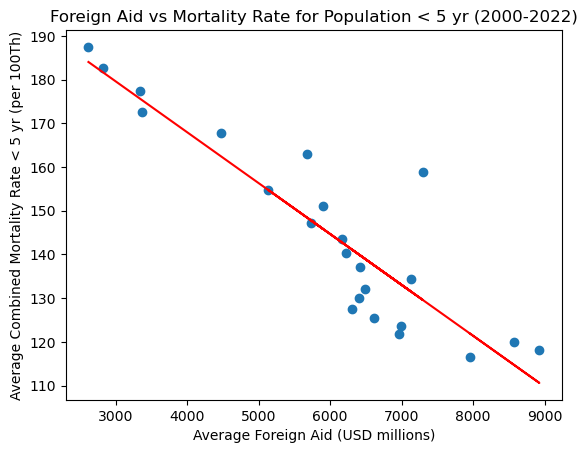

<Figure size 640x480 with 0 Axes>

In [26]:
#Africa Mortality vs Foreign Aid for 2022
# Print out the r-squared value along with the plot.
y_values = Mort_combo_table2["Average Mortality Rate"]
x_values = Aid_table2["Average Foreign Aid"]/1_000_000
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.ylabel('Average Combined Mortality Rate < 5 yr (per 100Th)')
plt.xlabel('Average Foreign Aid (USD millions)')
plt.title ('Foreign Aid vs Mortality Rate for Population < 5 yr (2000-2022)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Save the figure
plt.savefig("Output/Fig3_Mortality vs Aid Linear Regression.png")

The r-squared is: 0.9999948164530856


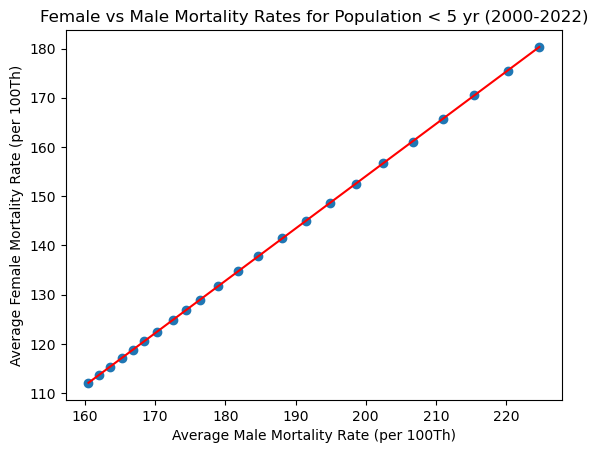

<Figure size 640x480 with 0 Axes>

In [27]:
#Female Mortality vs Male Mortality
# Print out the r-squared value along with the plot.
y_values = Mort_fem_table2["Average Mortality Rate"]
x_values = Mort_ma_table2["Average Mortality Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.ylabel('Average Female Mortality Rate (per 100Th)')
plt.xlabel('Average Male Mortality Rate (per 100Th)')
plt.title ('Female vs Male Mortality Rates for Population < 5 yr (2000-2022)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Save the figure
plt.savefig("Output/Fig4_Female vs Male Mortality Linear Regression.png")

The r-squared is: 0.6680894244279545


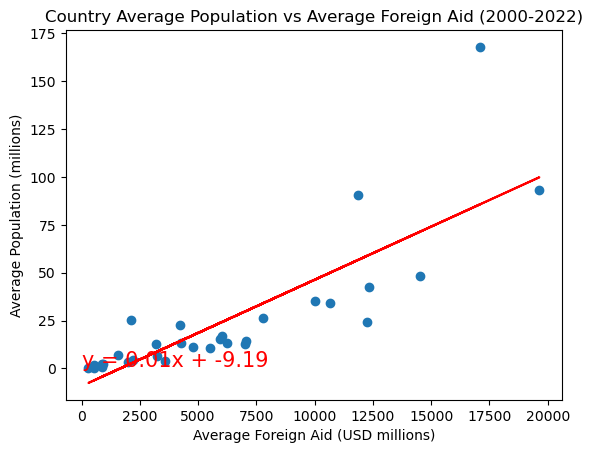

<Figure size 640x480 with 0 Axes>

In [46]:
#Foreign Aid vs Population
# Print out the r-squared value along with the plot.
y_values = TOT_table_country2["Average Population"]/1_000_000
x_values = aid_table_country["Average Foreign Aid"]/1_000_000
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.ylabel('Average Population (millions)')
plt.xlabel('Average Foreign Aid (USD millions)')
plt.title ('Country Average Population vs Average Foreign Aid (2000-2022)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Save the figure
plt.savefig("Output/Fig8_PopvsAidLinear Regression.png")

Does Foreign Aid have an impact on the mortality rate for population under 5 years old?
Alternate Hypthesis: Foreign aid contributions will help reduce the mortality rate for the population under 5 years old.
Null Hypthesis: Foreign aid contributions will NOT help reduce the mortality rate for the population under 5 years old.


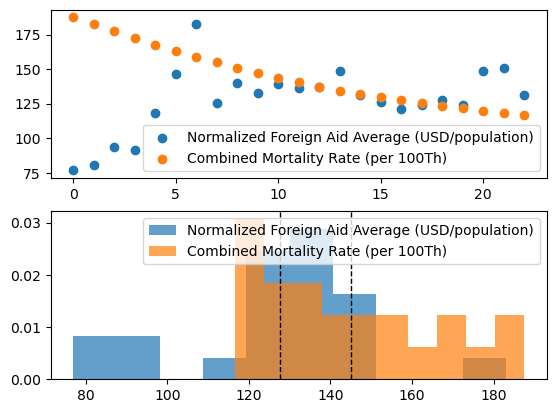

In [28]:
print("Does Foreign Aid have an impact on the mortality rate for population under 5 years old?")
print("Alternate Hypthesis: Foreign aid contributions will help reduce the mortality rate for the population under 5 years old.")
print("Null Hypthesis: Foreign aid contributions will NOT help reduce the mortality rate for the population under 5 years old.")

population_aid = Aid_table2["Foreign Aid Normalized"]
population_mortality = Mort_combo_table2["Average Mortality Rate"]

# Scatter Plot of Data
plt.subplot(2, 1, 1)
plt.scatter(range(len(population_aid)), population_aid, label="Normalized Foreign Aid Average (USD/population)")
plt.scatter(range(len(population_mortality)), population_mortality, label="Combined Mortality Rate (per 100Th)")
plt.legend()


# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(population_aid, 10, density=True, alpha=0.7, label="Normalized Foreign Aid Average (USD/population)")
plt.hist(population_mortality, 10, density=True, alpha=0.7, label="Combined Mortality Rate (per 100Th)")
plt.axvline(population_aid.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(population_mortality.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend() 

# Save the figure
plt.savefig("Output/Fig5_t-Test AidvsMortality.png")

Is Foreign Aid dependent on the population size?
Alternate Hypthesis: Foreign aid contributions are distributed based on the size of the population.
Null Hypthesis: Foreign aid contributions are distributed based on the size of the population.


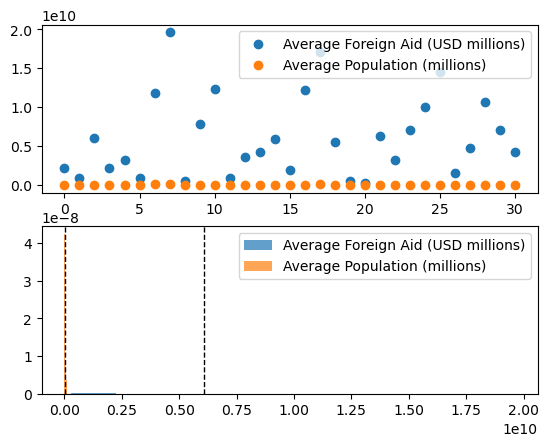

In [50]:
print("Is Foreign Aid dependent on the population size?")
print("Alternate Hypthesis: Foreign aid contributions are distributed based on the size of the population.")
print("Null Hypthesis: Foreign aid contributions are distributed based on the size of the population.")

population_aid_country = aid_table_country["Average Foreign Aid"]
population_pop_country = TOT_table_country2["Average Population"]

# Scatter Plot of Data
plt.subplot(2, 1, 1)
plt.scatter(range(len(population_aid_country)), population_aid_country, label='Average Foreign Aid (USD millions)')
plt.scatter(range(len(population_pop_country)), population_pop_country, label="Average Population (millions)")
plt.legend()


# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(population_aid_country, 10, density=True, alpha=0.7, label="Average Foreign Aid (USD millions)")
plt.hist(population_pop_country, 20, density=True, alpha=0.7, label="Average Population (millions)")
plt.axvline(population_aid_country.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(population_pop_country.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend() 

# Save the figure
plt.savefig("Output/Fig9_t-Test AidvsPopulation.png")

In [48]:
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
stats.ttest_ind(population_aid_country, population_pop_country, equal_var=False)

Ttest_indResult(statistic=6.537334990416828, pvalue=3.136712381433701e-07)

Is there a difference between the Female and Male mortality rates for population under 5 years old?
Alternate Hypthesis: There is a significant difference between the Female and Male mortality rates for population under 5 years old.
Null Hypthesis: There is NOT a significant difference between the Female and Male mortality rates for population under 5 years old.


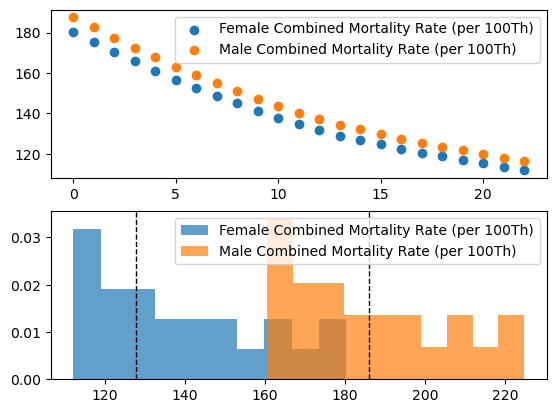

In [30]:
print("Is there a difference between the Female and Male mortality rates for population under 5 years old?")
print("Alternate Hypthesis: There is a significant difference between the Female and Male mortality rates for population under 5 years old.")
print("Null Hypthesis: There is NOT a significant difference between the Female and Male mortality rates for population under 5 years old.")

population_fem_mort = Mort_fem_table2["Average Mortality Rate"]
population_ma_mort = Mort_ma_table2["Average Mortality Rate"]

# Scatter Plot of Data
plt.subplot(2, 1, 1)
plt.scatter(range(len(population_fem_mort)), population_fem_mort, label="Female Combined Mortality Rate (per 100Th)")
plt.scatter(range(len(population_mortality)), population_mortality, label="Male Combined Mortality Rate (per 100Th)")
plt.legend()

# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(population_fem_mort, 10, density=True, alpha=0.7, label="Female Combined Mortality Rate (per 100Th)")
plt.hist(population_ma_mort, 10, density=True, alpha=0.7, label="Male Combined Mortality Rate (per 100Th)")
plt.axvline(population_aid.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(population_ma_mort.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend() 

# Save the figure
plt.savefig("Output/Fig7_t-Test MalevsFemaleMortality.png")

In [32]:
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
stats.ttest_ind(population_fem_mort, population_ma_mort, equal_var=False)

Ttest_indResult(statistic=-7.736177685637445, pvalue=9.908678073477023e-10)